# Customers segmentation

##### The project focuses on customer segmentation based on their purchasing behavior, response to marketing campaigns and demographic characteristics. The goal is to identify customer groups that will allow the company to better tailor its offers and promotional campaigns to different customer segments.

## Import libraries

In [235]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, PowerTransformer
from scipy.stats import skew
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from matplotlib.colors import ListedColormap

## Data loading and initial analysis 

In [236]:
df = pd.read_csv("marketing_campaign.csv", sep='\t')

In [237]:
pd.set_option('display.max_columns', None)
df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [238]:
df.shape

(2240, 29)

In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [240]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [241]:
df.dtypes.value_counts()

int64      25
object      3
float64     1
Name: count, dtype: int64

## Data cleaning

In [242]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [243]:
median_income = df['Income'].median()
df['Income'] = df['Income'].fillna(median_income)

In [244]:
df.duplicated().sum()

0

## Feature engineering

In [245]:
df.drop(columns=['ID','Z_Revenue', 'Z_CostContact'], inplace=True)

In [246]:
current_year = 2024
df['Age'] = current_year - df['Year_Birth']
df.drop(columns=['Year_Birth'], inplace=True)

In [247]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
today = pd.to_datetime('2024-01-01')
df['Days_Customer'] = (today - df['Dt_Customer']).dt.days
df.drop(columns=['Dt_Customer'], inplace=True)

In [248]:
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Days_Customer
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,67,4136
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,70,3586
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,59,3785
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,40,3612
4,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,43,3634


## EDA

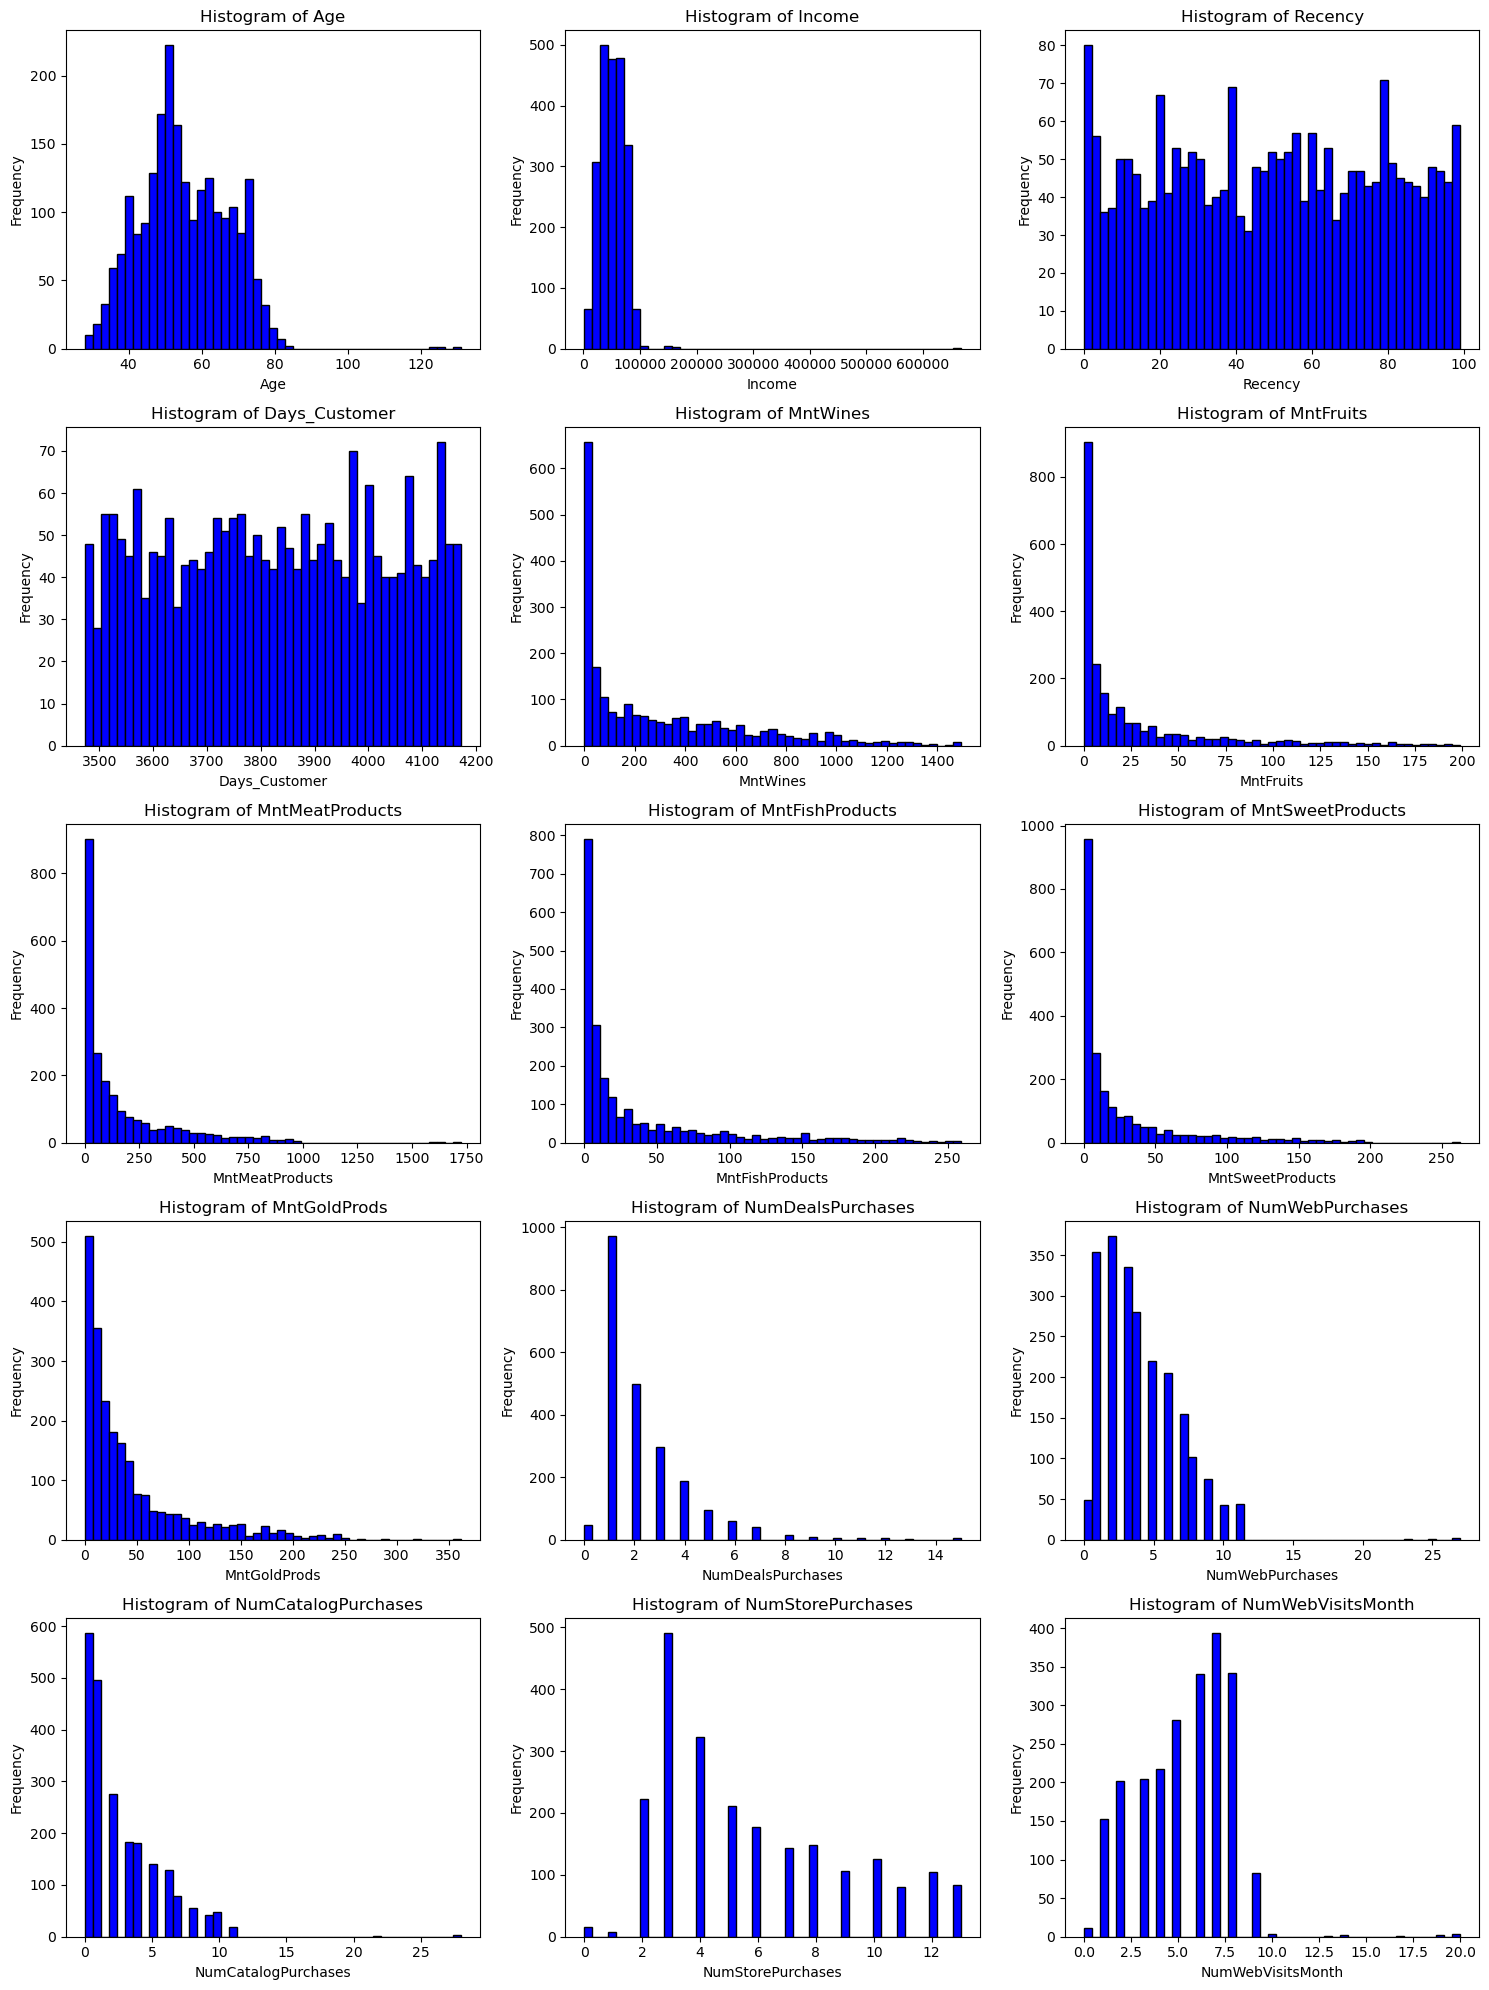

In [249]:
numeric_columns = [
    'Age', 'Income', 'Recency', 'Days_Customer',
    'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
    'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
    'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
    'NumWebVisitsMonth'
]

plt.figure(figsize=(15, 20))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(5, 3, i)
    plt.hist(df[column], bins=47, color='blue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

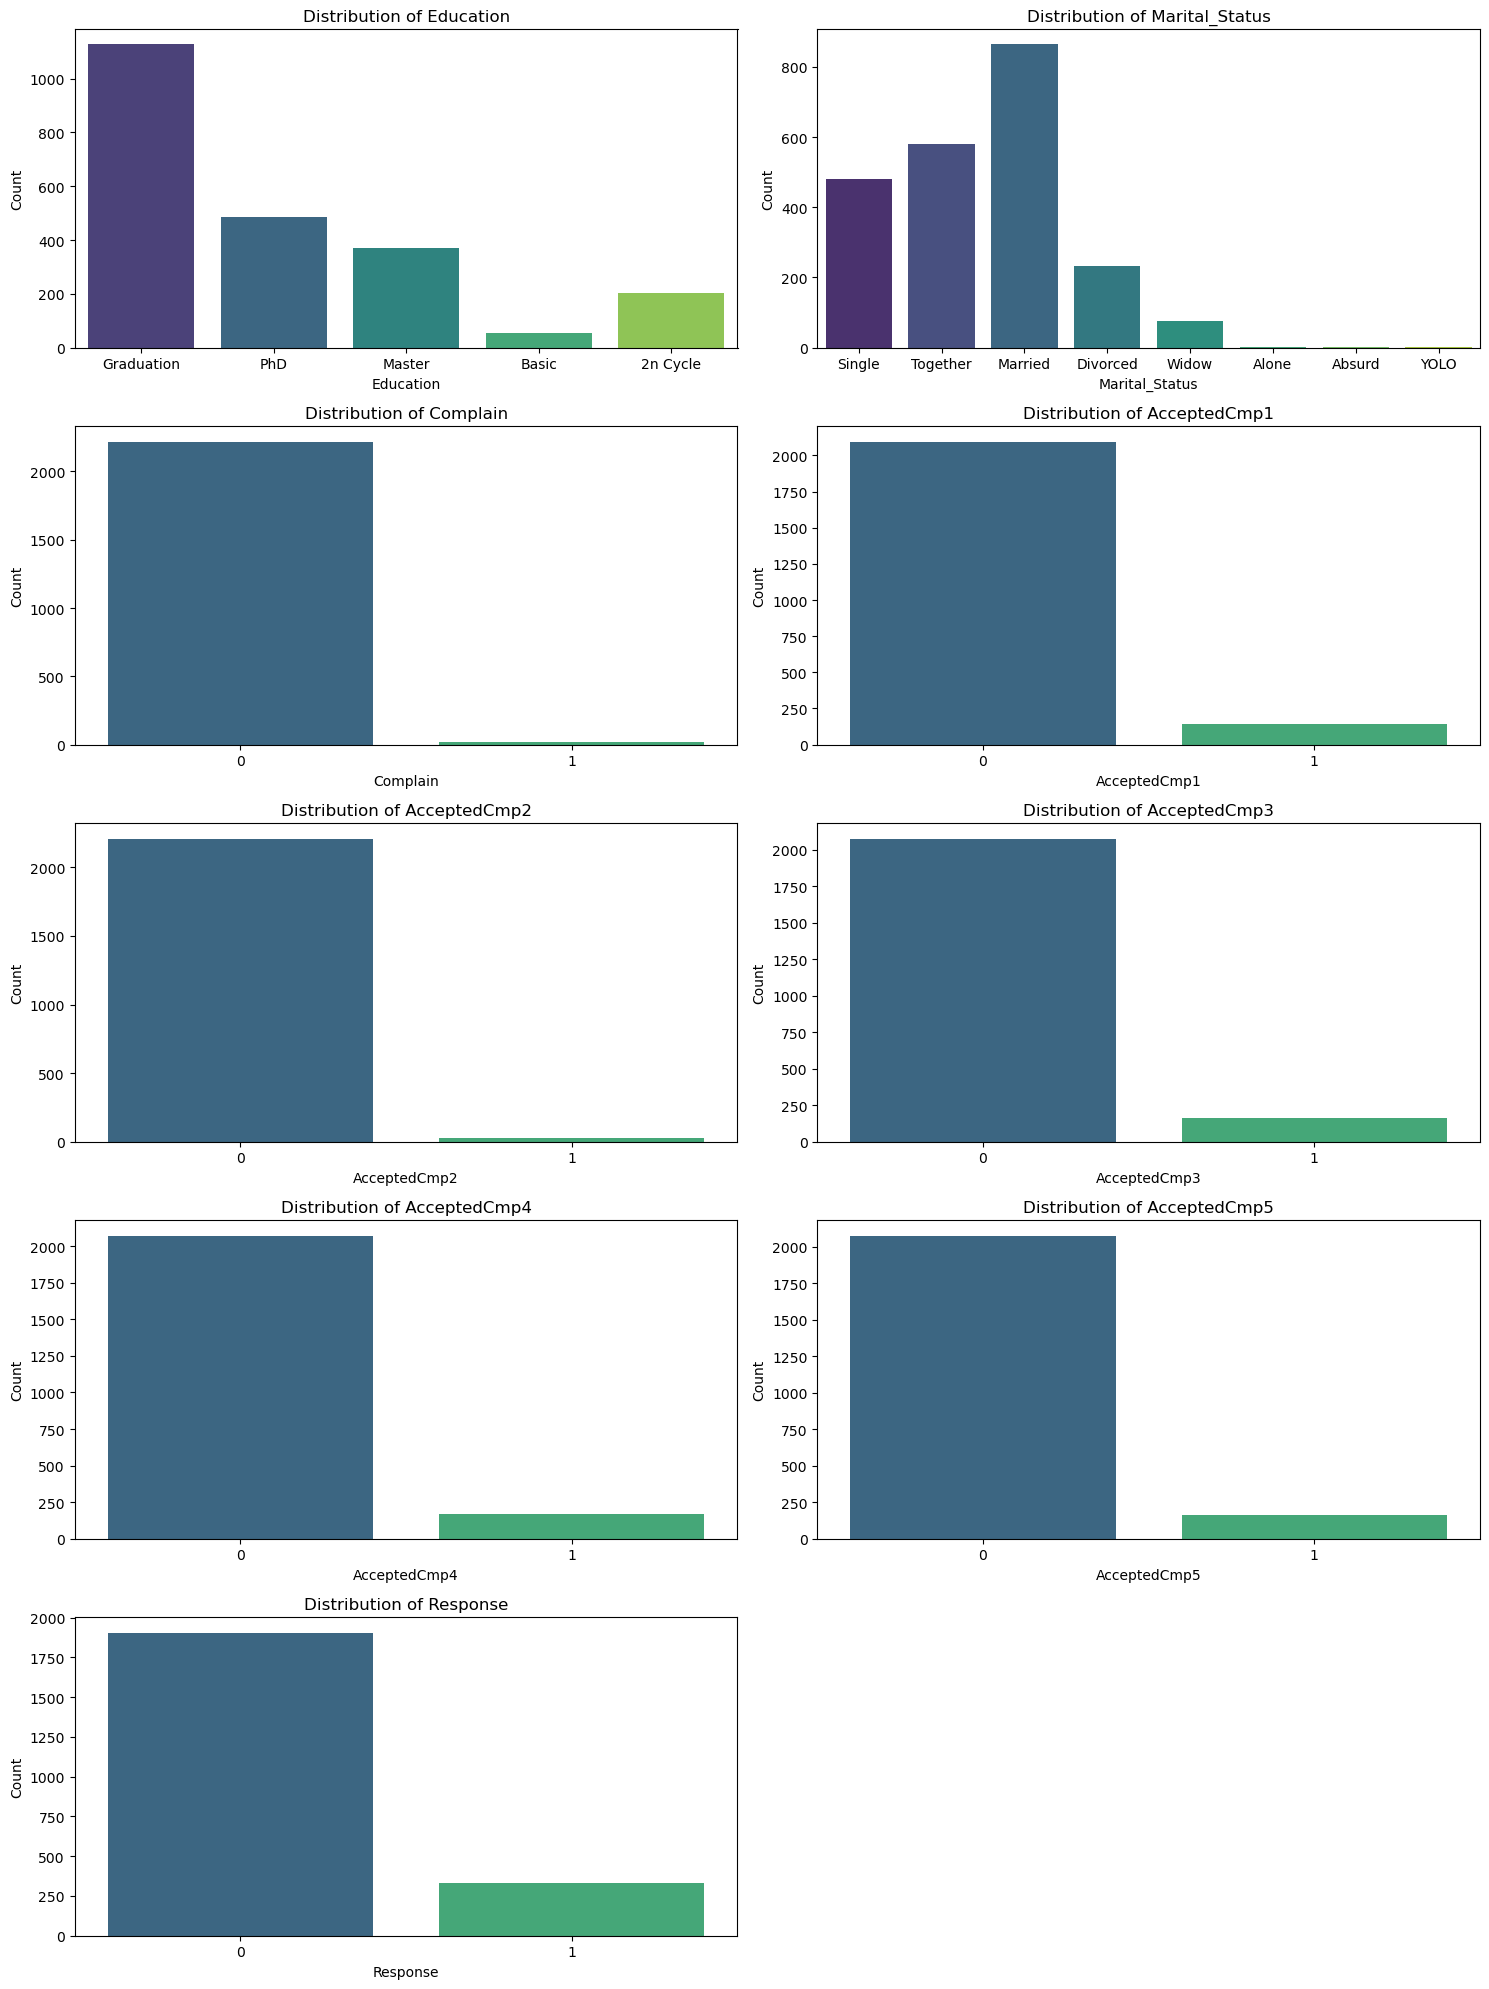

In [250]:
categorical_columns = ['Education', 'Marital_Status', 'Complain',
                       'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 
                       'AcceptedCmp4', 'AcceptedCmp5', 'Response']

plt.figure(figsize=(15, 20))

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(5, 2, i)
    sns.countplot(data=df, x=column, palette='viridis')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

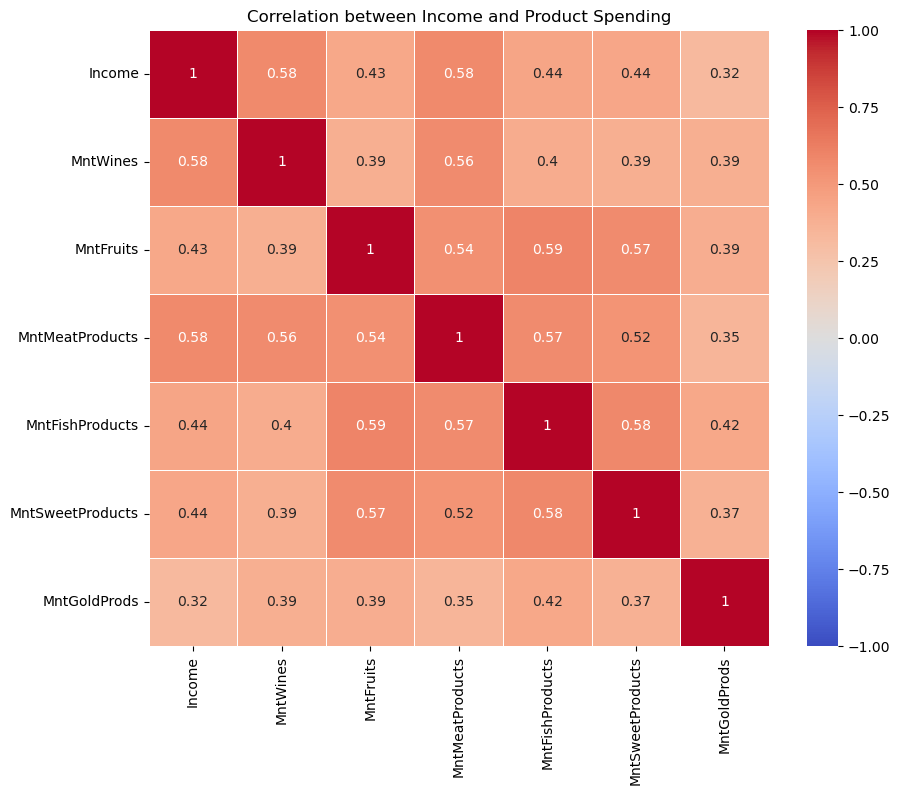

In [251]:
correlation_columns = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts',
                       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

correlation_matrix = df[correlation_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation between Income and Product Spending')
plt.show()


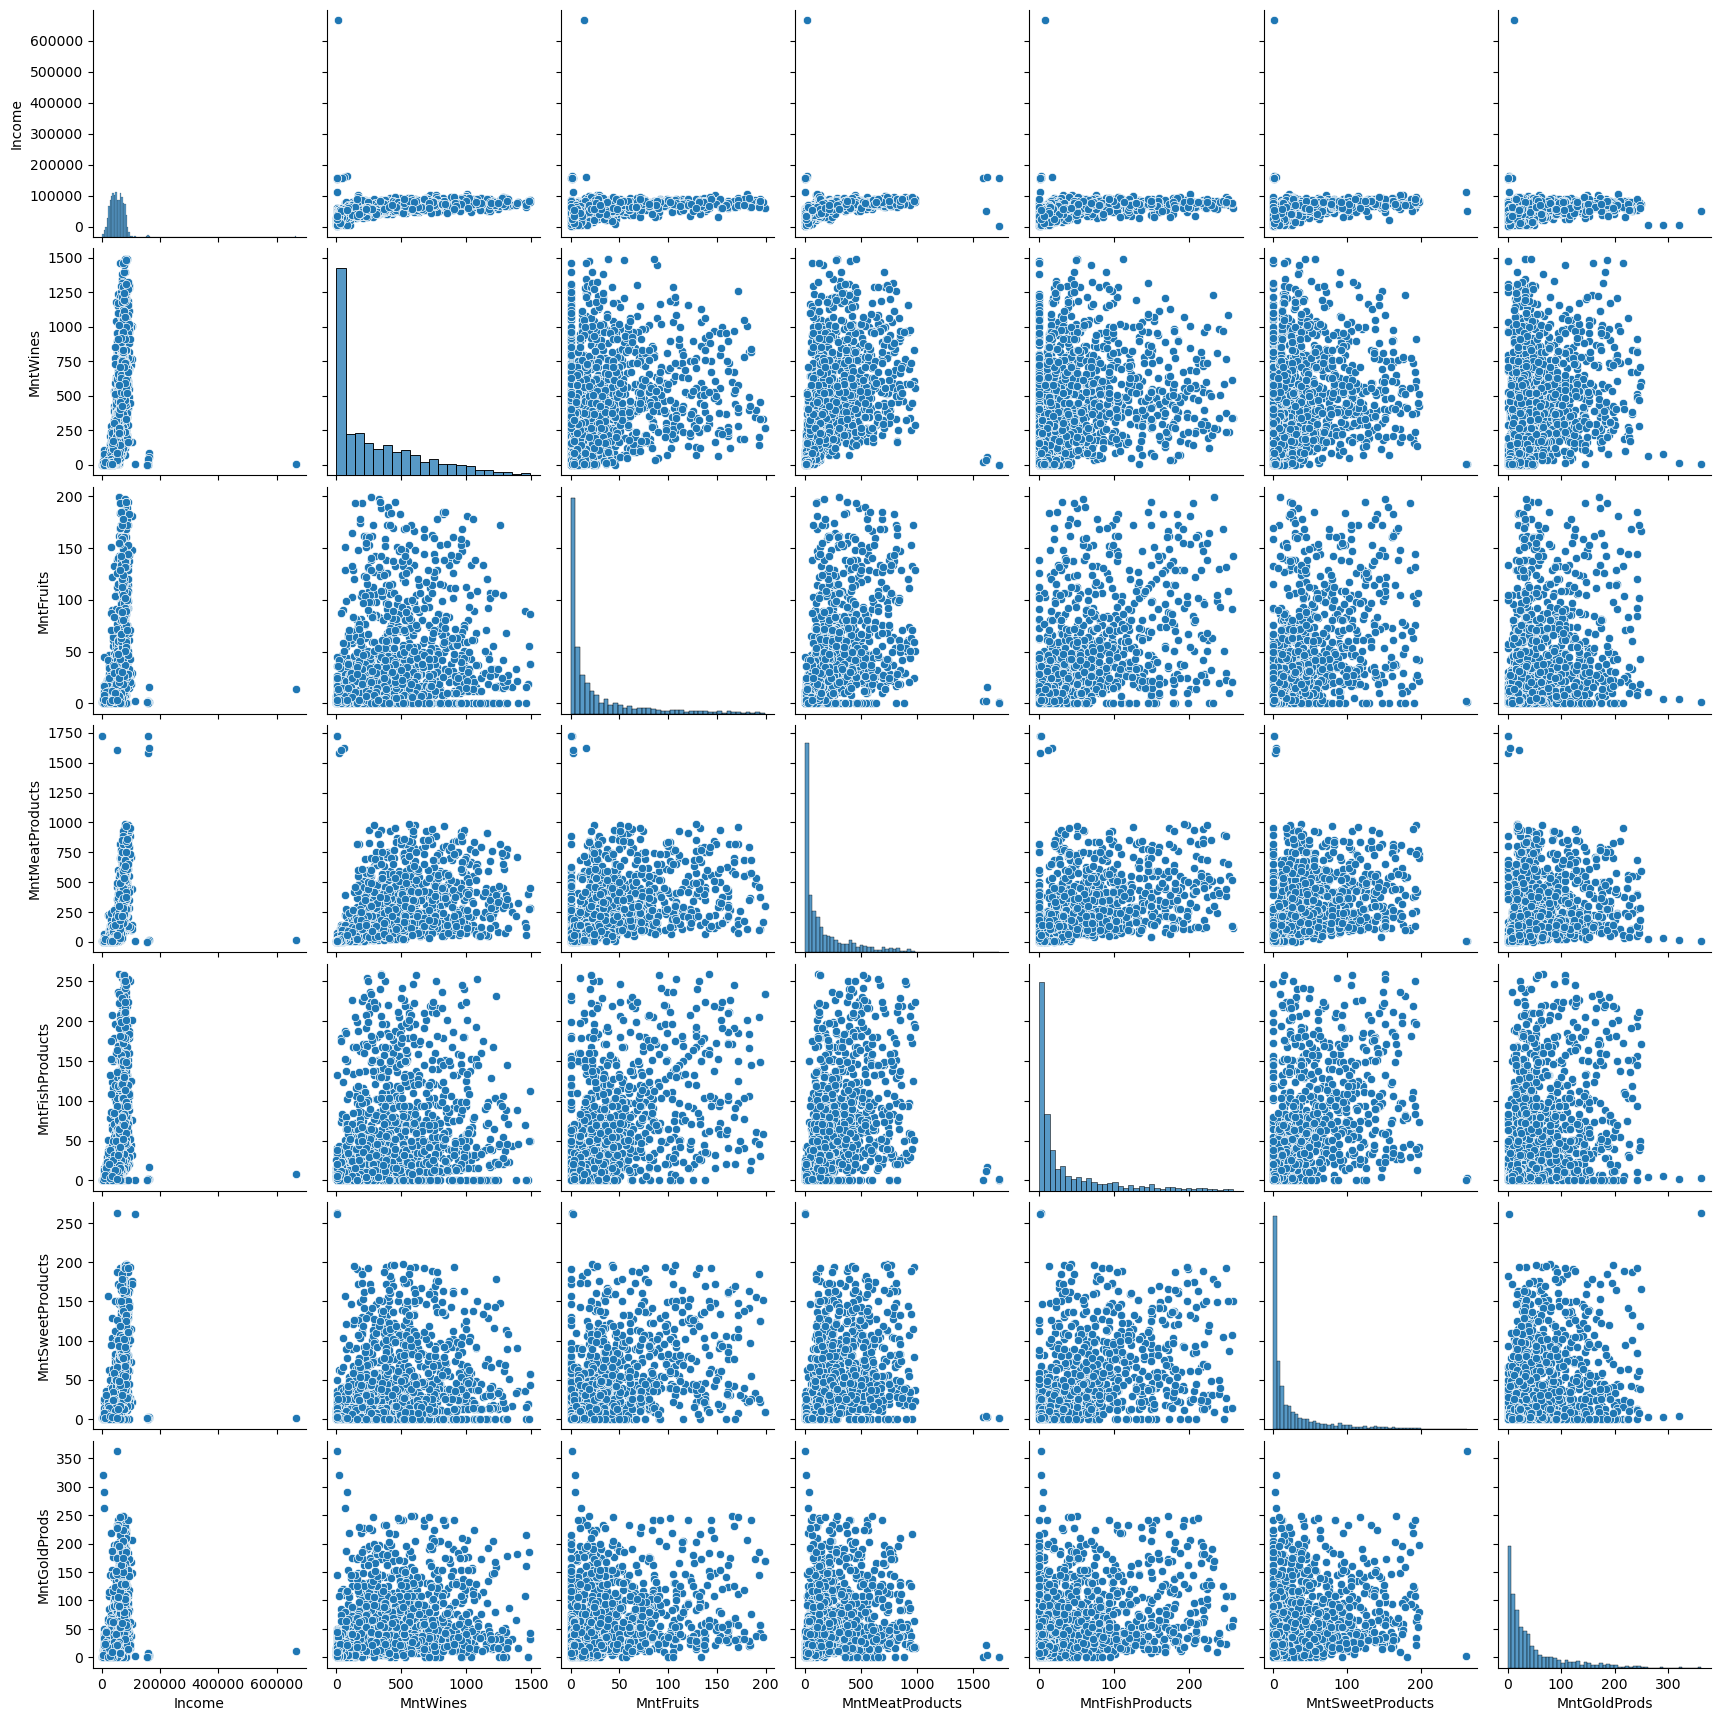

In [252]:
numeric_columns = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts',
                   'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

sns.pairplot(df[numeric_columns])
plt.show()

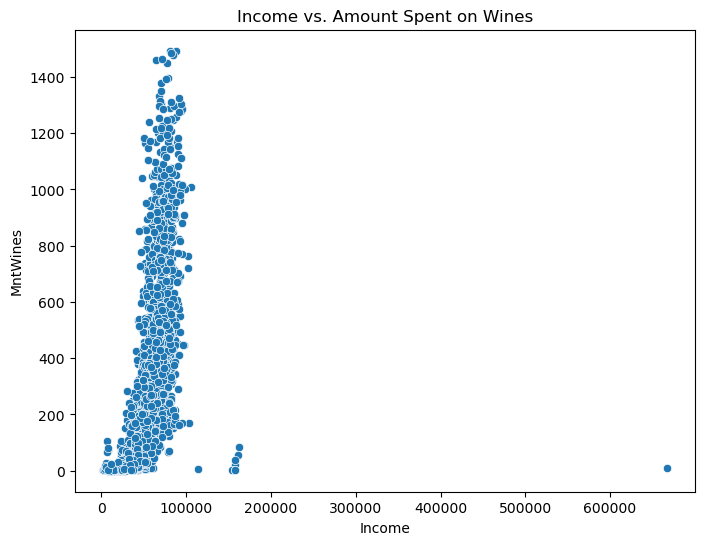

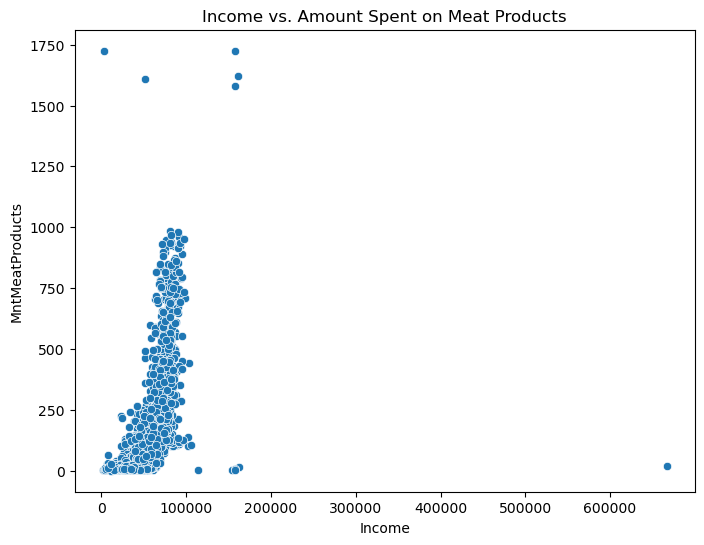

In [253]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Income', y='MntWines', data=df)
plt.title('Income vs. Amount Spent on Wines')
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(x='Income', y='MntMeatProducts', data=df)
plt.title('Income vs. Amount Spent on Meat Products')
plt.show()


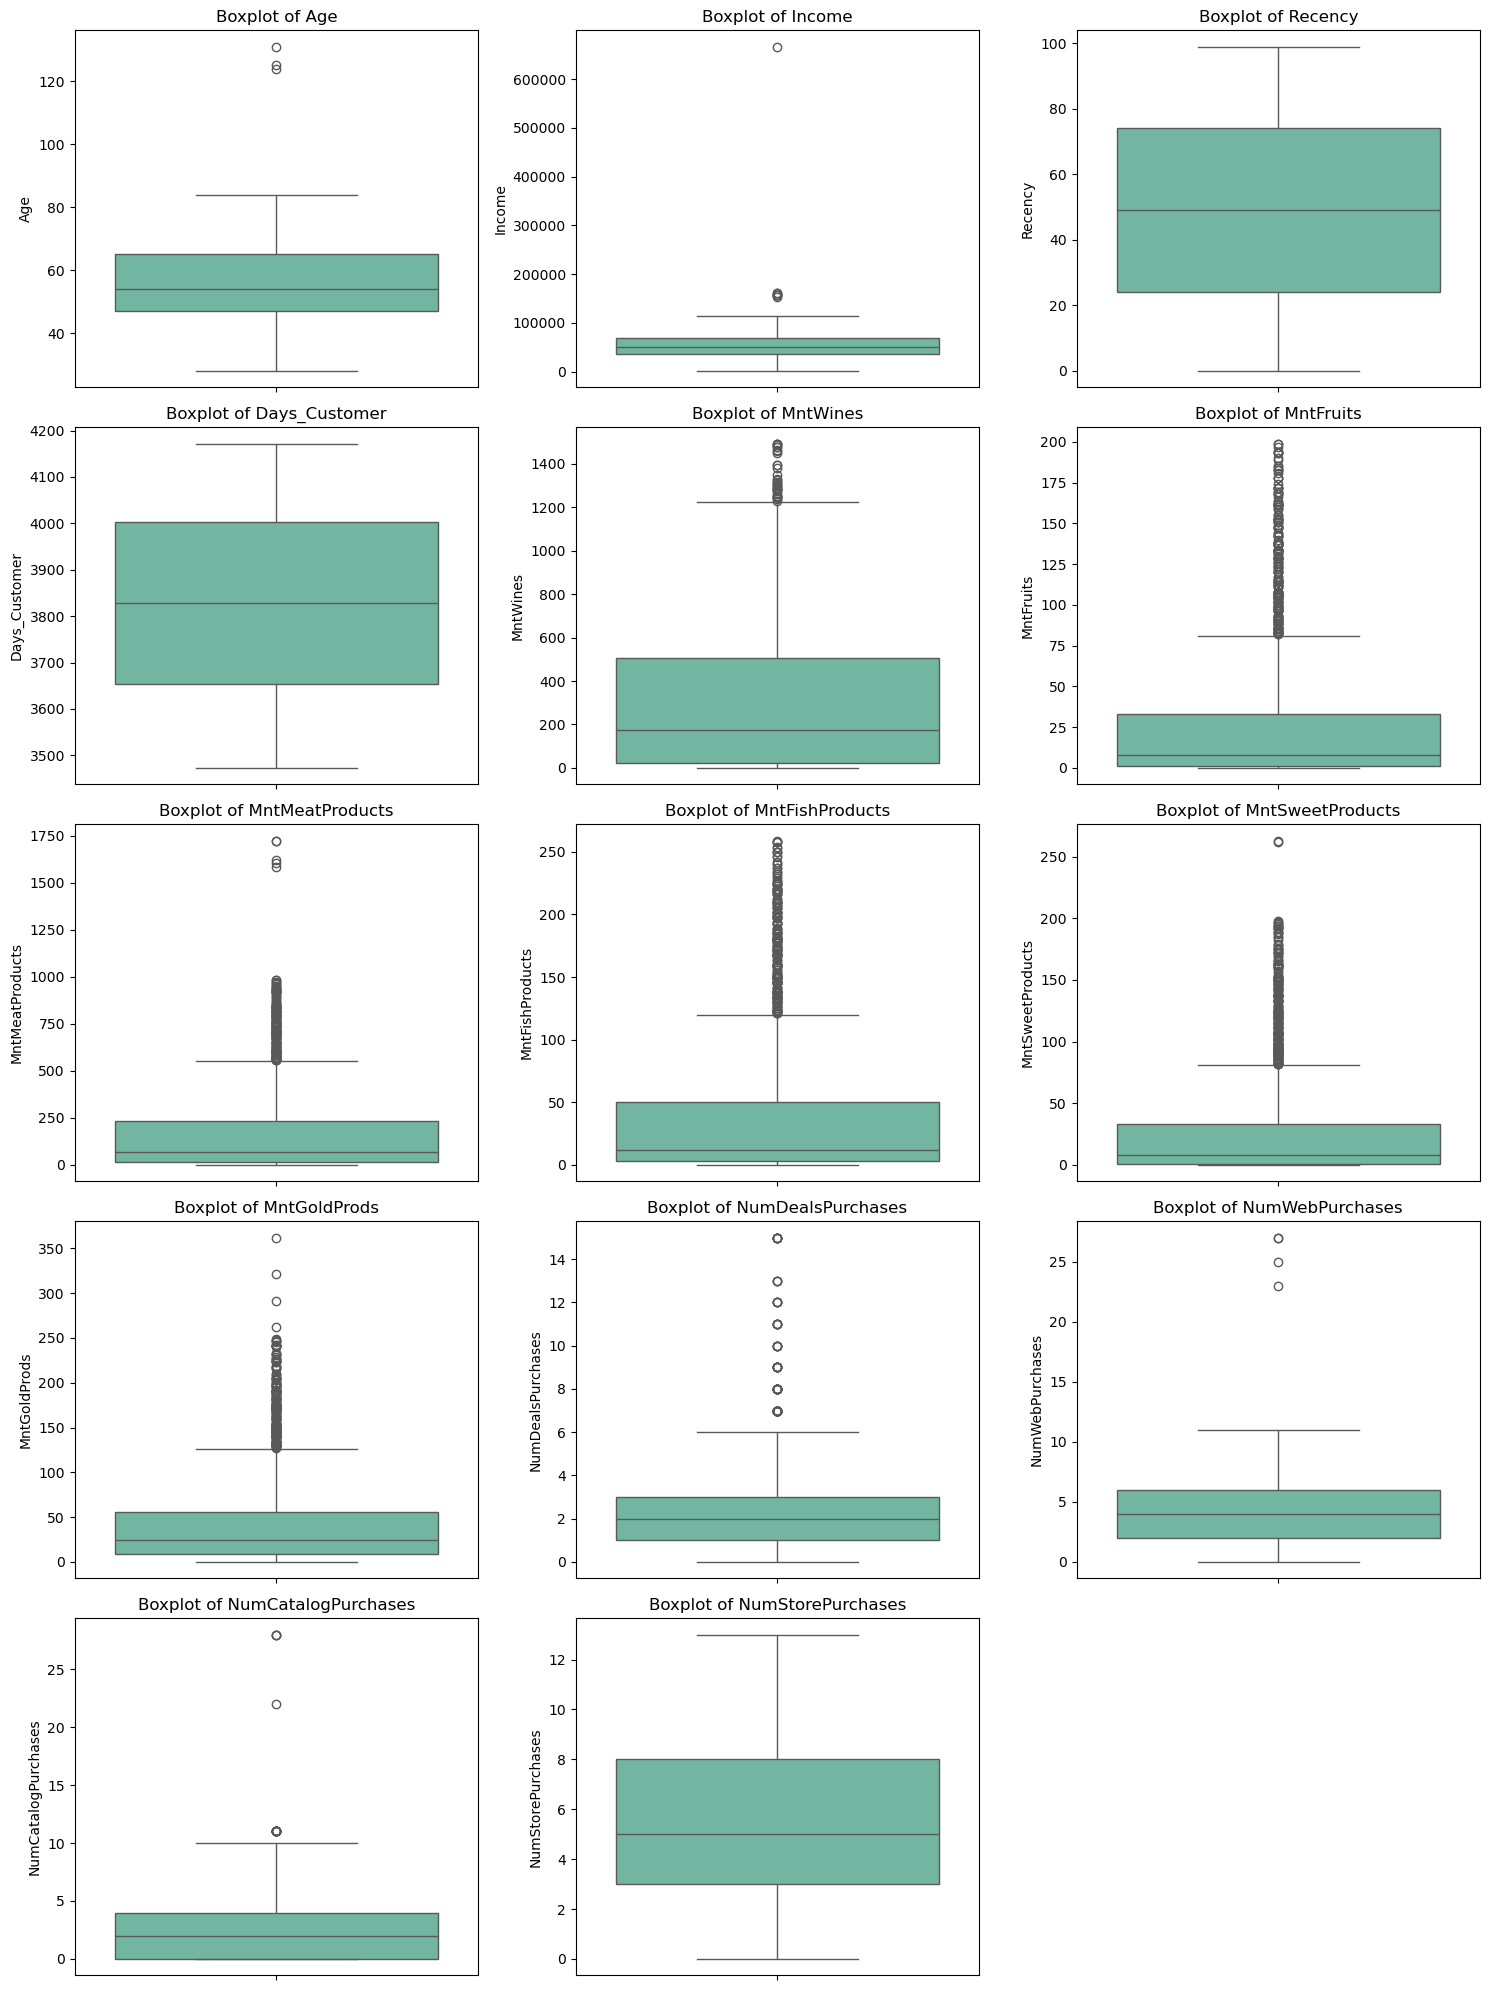

In [254]:
numeric_columns = ['Age', 'Income', 'Recency', 'Days_Customer',
                   'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                   'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
                   'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

plt.figure(figsize=(15, 20))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(data=df, y=column, palette='Set2')
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

## Deleting outliers

In [255]:
df_cleaned = df[df['Age'] <= 120]

df_cleaned = df_cleaned[df_cleaned['Income'] <= 600000]

df_cleaned = df_cleaned[df_cleaned['MntMeatProducts'] <= 1500]

df_cleaned = df_cleaned[df_cleaned['MntSweetProducts'] <= 200]

df_cleaned.shape[0]


2229

## Features coding

In [256]:
print(df['Education'].unique())
print(df['Marital_Status'].unique())

['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [257]:
original_data = pd.get_dummies(df_cleaned, columns=['Marital_Status'], drop_first=True)


In [258]:
one_hot_columns = original_data.filter(like='Marital_Status_').columns
original_data[one_hot_columns] = original_data[one_hot_columns].astype(int)

In [259]:
education_mapping = {
    'Basic': 1,
    '2n Cycle': 2,
    'Graduation': 3,
    'Master': 4,
    'PhD': 5
}

original_data['Education_Encoded'] = df_cleaned['Education'].map(education_mapping)

In [260]:
original_data = original_data.drop(columns='Education')

In [261]:
original_data.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Days_Customer,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Education_Encoded
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,67,4136,0,0,0,1,0,0,0,3
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,70,3586,0,0,0,1,0,0,0,3
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,59,3785,0,0,0,0,1,0,0,3
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,40,3612,0,0,0,0,1,0,0,3
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,43,3634,0,0,1,0,0,0,0,5


In [262]:
original_data.dtypes.value_counts()

int64      24
int32       7
float64     1
Name: count, dtype: int64

## Data standardization and transformation

In [263]:
binary_columns = ['Marital_Status_Together', 'Marital_Status_Married', 'Marital_Status_Divorced', 'Marital_Status_Widow', 
                  'Marital_Status_Alone', 'Marital_Status_Single', 'Marital_Status_YOLO', 
                  'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 
                  'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Response']

In [264]:
numeric_columns = [col for col in original_data.columns if col not in binary_columns]

In [265]:
skewness = original_data[numeric_columns].apply(skew)

In [266]:
skewness

Income                 0.212285
Kidhome                0.634727
Teenhome               0.402178
Recency               -0.007617
MntWines               1.171393
MntFruits              2.098241
MntMeatProducts        1.725865
MntFishProducts        1.914085
MntSweetProducts       2.068909
MntGoldProds           1.832348
NumDealsPurchases      2.258398
NumWebPurchases        0.992383
NumCatalogPurchases    1.107952
NumStorePurchases      0.707921
NumWebVisitsMonth      0.217393
Age                    0.087414
Days_Customer         -0.015200
Education_Encoded      0.125007
dtype: float64

In [268]:
data = original_data.copy()

In [269]:
standard_scaler_columns = skewness[abs(skewness) < 0.5].index.tolist()
power_transformer_columns = skewness[abs(skewness) >= 0.5].index.tolist()

In [270]:
scaler = StandardScaler()
data[standard_scaler_columns] = scaler.fit_transform(data[standard_scaler_columns])

In [271]:
power_transformer = PowerTransformer()
data[power_transformer_columns] = power_transformer.fit_transform(data[power_transformer_columns])


In [272]:
data.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Days_Customer,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Education_Encoded
0,0.301398,-0.853918,-0.932510,0.305578,1.055834,1.408189,1.433923,1.602719,1.390793,1.091305,0.752295,1.347368,1.756260,-0.420984,0.689849,0,0,0,0,0,0,1,1.015996,1.532261,0,0,0,1,0,0,0,-0.458987
1,-0.259841,1.137876,0.903678,-0.385472,-1.217260,-0.987352,-1.379712,-0.872365,-0.971831,-0.943615,0.160526,-1.373133,-0.379903,-1.467433,-0.138193,0,0,0,0,0,0,0,1.272537,-1.191032,0,0,0,1,0,0,0,-0.458987
2,0.942631,-0.853918,-0.932510,-0.800101,0.742190,1.061742,0.449324,1.327741,0.552058,0.446584,-0.831046,1.347368,0.155414,1.241983,-0.552213,0,0,0,0,0,0,0,0.331888,-0.205695,0,0,0,0,1,0,0,-0.458987
3,-1.197207,1.137876,-0.932510,-0.800101,-1.217260,-0.383594,-0.709572,-0.100684,-0.519966,-1.048718,0.160526,-0.722810,-1.337053,-0.420984,0.275828,0,0,0,0,0,0,0,-1.292870,-1.062294,0,0,0,0,1,0,0,-0.458987
4,0.308774,1.137876,-0.932510,1.549467,0.117384,0.984114,0.401178,0.785570,0.699317,-0.346717,1.455028,0.526760,0.524632,0.281500,-0.138193,0,0,0,0,0,0,0,-1.036329,-0.953363,0,0,1,0,0,0,0,1.535324


## Clustering


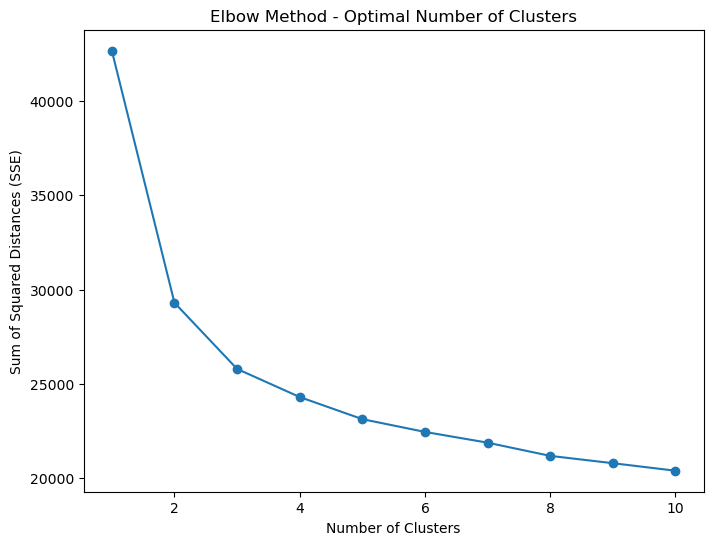

In [273]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    sse.append(kmeans.inertia_)  

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method - Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.show()

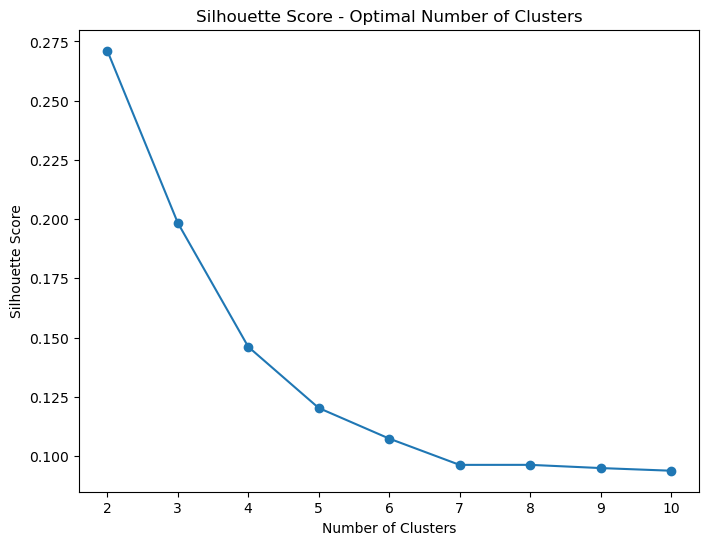

In [274]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)  
    kmeans.fit(data)
    score = silhouette_score(data, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score - Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

Choosing the Optimal Number of Clusters: 3 Clusters

The choice of 3 clusters was based on the results of both the Elbow Method and the Silhouette Score analysis.

Elbow Method: The Elbow Method revealed a clear "elbow" point at 3 clusters. After this point, the reduction in the Sum of Squared Distances (SSE) becomes less significant, suggesting that adding more clusters does not substantially improve the model's performance. Therefore, 3 clusters provide a good balance between accuracy and simplicity.

Silhouette Score: Although the highest Silhouette Score was observed for 2 clusters, a score of 0.20 for 3 clusters still indicates good separation between clusters. This score, combined with the Elbow Method, justifies the decision to choose 3 clusters, allowing for a more granular segmentation of the customer base compared to 2 clusters, while still maintaining meaningful distinctions between groups.

Choosing 3 clusters allows us to capture important differences in customer behavior and preferences, without over-complicating the model. This segmentation strikes a balance between having sufficient clusters to capture different customer types while avoiding excessive fragmentation.

In [275]:
kmeans = KMeans(n_clusters=3, random_state=42)

kmeans.fit(data)

data['Cluster'] = kmeans.labels_

print(data['Cluster'].value_counts())

data.head()

Cluster
2    885
0    676
1    668
Name: count, dtype: int64


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Days_Customer,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Education_Encoded,Cluster
0,0.301398,-0.853918,-0.932510,0.305578,1.055834,1.408189,1.433923,1.602719,1.390793,1.091305,0.752295,1.347368,1.756260,-0.420984,0.689849,0,0,0,0,0,0,1,1.015996,1.532261,0,0,0,1,0,0,0,-0.458987,1
1,-0.259841,1.137876,0.903678,-0.385472,-1.217260,-0.987352,-1.379712,-0.872365,-0.971831,-0.943615,0.160526,-1.373133,-0.379903,-1.467433,-0.138193,0,0,0,0,0,0,0,1.272537,-1.191032,0,0,0,1,0,0,0,-0.458987,2
2,0.942631,-0.853918,-0.932510,-0.800101,0.742190,1.061742,0.449324,1.327741,0.552058,0.446584,-0.831046,1.347368,0.155414,1.241983,-0.552213,0,0,0,0,0,0,0,0.331888,-0.205695,0,0,0,0,1,0,0,-0.458987,1
3,-1.197207,1.137876,-0.932510,-0.800101,-1.217260,-0.383594,-0.709572,-0.100684,-0.519966,-1.048718,0.160526,-0.722810,-1.337053,-0.420984,0.275828,0,0,0,0,0,0,0,-1.292870,-1.062294,0,0,0,0,1,0,0,-0.458987,2
4,0.308774,1.137876,-0.932510,1.549467,0.117384,0.984114,0.401178,0.785570,0.699317,-0.346717,1.455028,0.526760,0.524632,0.281500,-0.138193,0,0,0,0,0,0,0,-1.036329,-0.953363,0,0,1,0,0,0,0,1.535324,0


In [276]:
original_data['Cluster'] = data['Cluster']

In [277]:
original_data.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Days_Customer,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Education_Encoded,Cluster
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,67,4136,0,0,0,1,0,0,0,3,1
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,70,3586,0,0,0,1,0,0,0,3,2
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,59,3785,0,0,0,0,1,0,0,3,1
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,40,3612,0,0,0,0,1,0,0,3,2
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,43,3634,0,0,1,0,0,0,0,5,0


## Cluster analysis

In [278]:
cluster_profile = original_data.groupby('Cluster').agg({
    'Income': 'mean',               
    'MntWines': 'mean',             
    'MntGoldProds': 'mean',         
    'NumDealsPurchases': 'mean',    
    'NumWebVisitsMonth': 'mean',    
    'NumWebPurchases': 'mean',      
    'NumStorePurchases': 'mean'     
})

cluster_profile

,Income,MntWines,MntGoldProds,NumDealsPurchases,NumWebVisitsMonth,NumWebPurchases,NumStorePurchases
Cluster,,,,,,,
0,54609.200444,400.093195,53.974852,3.890533,6.161243,5.897929,6.892012
1,73668.007485,577.094311,75.486527,1.297904,2.925150,5.223054,8.511976
2,33159.164407,27.058757,12.474576,1.874576,6.519774,1.819209,2.951412


Cluster 0 - this group consists of moderate-income customers who actively engage in both online and in-store shopping. They are also moderately responsive to promotions.
Cluster 1 - consists of high-income customers who prefer luxury products and are more likely to shop in physical stores than online. They are less interested in promotions but have higher spending power.
Cluster 2 - this group consists of low-income customers who are more price-sensitive and make fewer purchases overall. They are relatively active online but spend less on luxury products.

These insights can be used to tailor marketing strategies, focusing on luxury products for Cluster 1, promotion-driven campaigns for Cluster 0, and perhaps budget-friendly offers for Cluster 2.

In [279]:
campaign_response = original_data.groupby('Cluster')[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 
                                                      'AcceptedCmp4', 'AcceptedCmp5', 'Response']].mean()

campaign_response


,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
Cluster,,,,,,
0,0.039941,0.017751,0.075444,0.124260,0.023669,0.144970
1,0.175150,0.023952,0.076347,0.109281,0.218563,0.244012
2,0.000000,0.002260,0.068927,0.010169,0.000000,0.082486


Cluster 1 is the most engaged and responsive to marketing campaigns, making them a prime target for future marketing initiatives. Their high response rates across multiple campaigns suggest they are particularly open to offers and could benefit from personalized, targeted campaigns.

Cluster 0 shows a moderate level of engagement, with notable spikes in Campaign 4 and the last campaign. This group may be more selective in responding to campaigns, but they still represent a valuable target, especially for campaigns tailored to their preferences.

Cluster 2 is the least responsive group, showing minimal interest in marketing efforts. This group is less likely to react positively to marketing campaigns, and as a result, marketing efforts toward this segment should be limited or focused on different strategies, such as retention through non-promotional means.

Recommendations:

Focus on Cluster 1: Since this group consistently responds to campaigns, it would be beneficial to target them with high-value or exclusive offers in future campaigns. Personalized marketing tailored to their preferences could further increase engagement.

Re-evaluate strategies for Cluster 2: Given the low engagement levels, it may not be cost-effective to focus heavy marketing efforts on this group. Instead, consider other strategies such as improving customer experience or offering loyalty incentives to retain these customers.

Tailor Campaigns for Cluster 0: Although this group is less responsive than Cluster 1, they still represent a significant portion of the customer base. Future campaigns could be designed to better align with their preferences, potentially increasing their engagement.

## Cluster visualizations

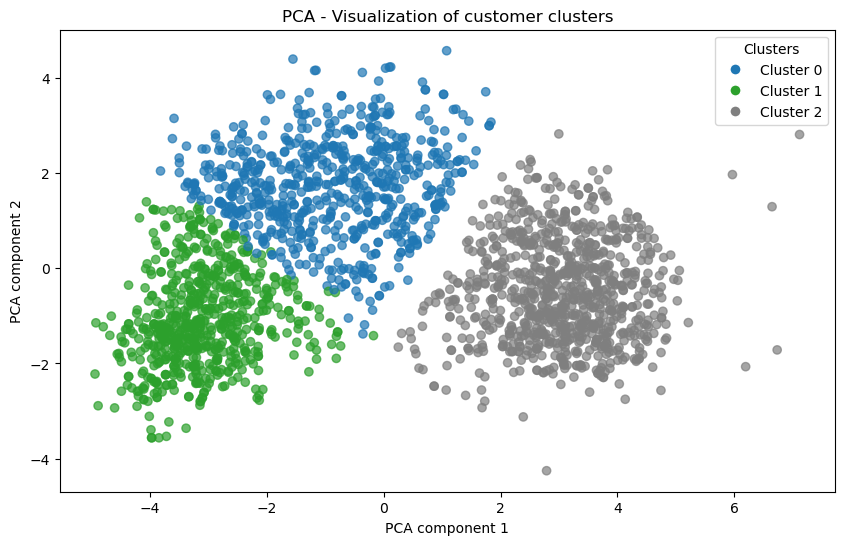

In [280]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data)

original_data['PCA1'] = pca_result[:, 0]
original_data['PCA2'] = pca_result[:, 1]

cluster_colors = ListedColormap(['#1f77b4', '#2ca02c', '#7f7f7f'])

cluster_labels = {0: 'Cluster 0', 1: 'Cluster 1', 2: 'Cluster 2'}

plt.figure(figsize=(10, 6))
scatter = plt.scatter(original_data['PCA1'], original_data['PCA2'], c=original_data['Cluster'], cmap=cluster_colors, alpha=0.7)
plt.title('PCA - Visualization of customer clusters')
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(i)), markersize=8) for i in range(3)]
plt.legend(handles, [cluster_labels[i] for i in range(3)], title="Clusters")
plt.xlabel('PCA component 1')
plt.ylabel('PCA component 2')
plt.show()

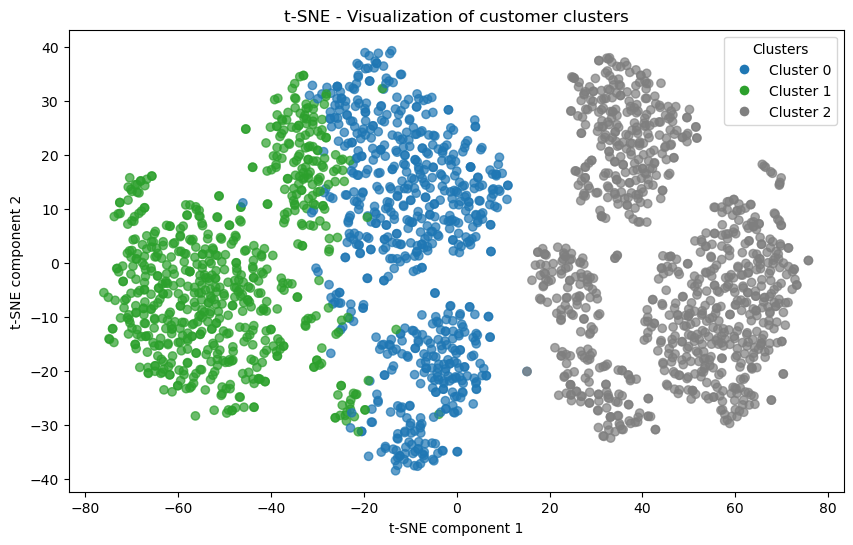

In [281]:
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(data)

original_data['tSNE1'] = tsne_result[:, 0]
original_data['tSNE2'] = tsne_result[:, 1]

plt.figure(figsize=(10, 6))
scatter = plt.scatter(original_data['tSNE1'], original_data['tSNE2'], c=original_data['Cluster'], cmap=cluster_colors, alpha=0.7)
plt.title('t-SNE - Visualization of customer clusters')
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(i)), markersize=8) for i in range(3)]
plt.legend(handles, [cluster_labels[i] for i in range(3)], title="Clusters")
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.show()


## Summary

In this project, I aimed to segment customers based on their purchasing behavior and demographic characteristics using clustering techniques. I employed the KMeans algorithm to divide the customer base into distinct groups and performed a detailed analysis of each segment to gain deeper insights into their preferences and responses to marketing campaigns.

The key steps of the project included:

Data Cleaning and Preprocessing: I handled missing values, encoded categorical variables, and standardized numerical features to prepare the data for clustering.

Clustering: Using KMeans, I segmented customers into three clusters. I determined the optimal number of clusters through the Elbow Method and Silhouette Score, both of which indicated that a 3-cluster solution was the most appropriate.

Cluster Profiling: I analyzed each cluster in terms of income, spending on luxury products, and purchasing behavior. The results revealed three distinct segments:

Cluster 1: High-income, luxury-oriented customers, showing strong engagement with marketing campaigns.

Cluster 0: Moderate-income customers, responsive to promotions and making frequent purchases both online and in-store.

Cluster 2: Price-sensitive, low-income customers, with lower engagement in marketing efforts and fewer purchases overall.

Campaign Analysis: I further examined the effectiveness of past marketing campaigns and found that Cluster 1 was the most responsive, while Cluster 2 showed minimal interaction with marketing efforts.

Visualization: I used PCA and t-SNE to visualize the clusters, confirming that they were well-separated and meaningfully distinct in the feature space.

Key Results:

The three identified clusters displayed significant differences in income levels, purchasing preferences, and responsiveness to marketing.

Cluster 1, consisting of high-income customers, represents the most valuable segment for future marketing efforts, particularly for luxury product promotions.

Cluster 0 shows potential for regular promotions, as these customers are active shoppers both online and in-store.

Cluster 2 should be targeted with budget-friendly offers, though it may require less investment in aggressive marketing.

This segmentation provides actionable insights for more targeted marketing strategies, ensuring that each group receives tailored campaigns suited to their preferences and purchasing power.